# Notebook for plotting camera in 3D space
Our goal is to plot a camera with its camera viewing axis along +Z axis and up direction along +Y axis when given a (world to camera) camera matrix $P=[R|t]$. We will plot the center of the camera and the camera axis in the world space.

In [4]:
import numpy as np
from numpy.typing import NDArray
from typing import List

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [9]:
def w2c_to_c2w(w2c:NDArray)->NDArray:
    """
    convert world2camera to camera2world
    Args:
        w2c (NDArray) [3,4]
    Return:
        c2w (NDArray) [3,4]
    """
    sh = w2c.shape
    assert sh == (3,4)
    R, t = w2c[:, :-1], w2c[:,-1]
    c = - R @ t
    c2w = np.hstack((R.T, c[:,None]))
    return c2w

def plot_cameras(w2cs:List[NDArray], scale=0.2) -> None:
    num_cams = len(w2cs)
    c2ws = [ w2c_to_c2w(w2c) for w2c in w2cs]
    
    # compute world center and dia
    if num_cams > 1:
        cs = np.array([c2w[:,-1] for c2w in c2ws]) #[N,3]
        world_center = np.mean(np.array(cs), axis=0) #[3]
        dists = np.linalg.norm(cs - world_center, axis=1) #[N]
        max_dist = np.max(dists) # max radius
    else:
        max_dist = 1.0

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.get_cmap('jet')
    colors = cmap(np.linspace(0, 1, num_cams))
    for i_cam, c2w in enumerate(c2ws):
        x, y, z, c = c2w.T
        # plot the camera center
        ax.plot(c[0], c[1], c[2], marker="*")
        # plot the x, y, z axis
        ax.quiver(c[0], c[1], c[2], x[0], x[1], x[2], length=scale*max_dist, color='r', normalize=True)
        ax.quiver(c[0], c[1], c[2], y[0], y[1], y[2], length=scale*max_dist, color='g', normalize=True)
        ax.quiver(c[0], c[1], c[2], z[0], z[1], z[2], length=scale*max_dist, color='b', normalize=True)
        # compute camera plane corners
        """
        c1 --- c2
        |   c   |
        c3 ----c4
        Y
        ^
        |
        ---> X
        """
        d = scale * max_dist
        c1 = c - d*x + d*y
        c2 = c + d*x + d*y
        c3 = c - d*x - d*y
        c4 = c + d*x - d*y
        corners = np.stack((c1, c2, c3, c4)) #[4,3]

        # plot camera plane
        ax.plot_trisurf(corners[:,0], corners[:,1], corners[:,2], color=colors[i_cam], alpha=0.5, edgecolor='none')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    return

def generate_random_orthogonal_matrix(n:int=3)->NDArray:
    # Generate a random matrix
    random_matrix = np.random.rand(n, n)    
    # Perform QR decomposition
    q, r = np.linalg.qr(random_matrix)    
    # Ensure the matrix is orthogonal
    q = q @ np.diag(np.sign(np.diag(r)))    
    return q

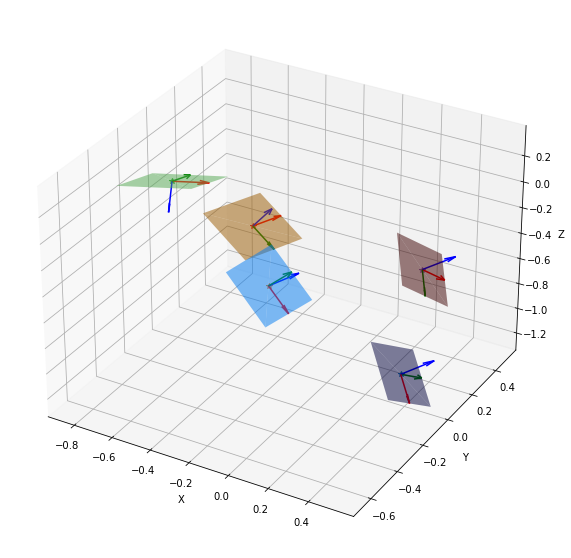

In [26]:
num_cams = 5
w2cs = []

for i in range(num_cams):
    R = generate_random_orthogonal_matrix()
    t = np.random.rand(3,1)
    P = np.hstack((R, t))

    w2cs.append(P)

plot_cameras(w2cs)
